# TO RUN
1. Make sure you installed all the dependencies
2. open **'init_notebook.py'** and change the **projectFolder** to the src folder of the repository.
3. In the following cell change the dataDir to the data directory of the InD dataset

In [1]:
dataDir = "E:/AV/DataSetExploration/drone-dataset-tools/data/location-2/home"

dataDir = "/home/office/AV/DataSetExploration/data/ind/location-2/csv"

In [2]:
exec(open('init_notebook.py').read())

current working dir/home/office/AV/DataSetExploration/TTI-dataset-tools/src


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

from tti_dataset_tools.TrajectoryTransformer import TrajectoryTransformer
from tti_dataset_tools.TrajectoryVisualizer import TrajectoryVisualizer
from tti_dataset_tools.TrajectoryCleaner import TrajectoryCleaner
from tti_dataset_tools.ColMapper import ColMapper

In [5]:
from ind_tools.IndTransformer import IndTransformer

In [6]:
sceneId = 10
date = "2022-12-22"
fps=5
minYDisplacement = 5
maxXDisplacement = 6
pedDf = pd.read_csv(os.path.join(dataDir, f"{date}-fps-{fps}-scene-{sceneId}-pedestrians.csv"))
otherDf = pd.read_csv(os.path.join(dataDir, f"{date}-fps-{fps}-scene-{sceneId}-others.csv"))
tracksMeta = pd.read_csv(os.path.join(dataDir, f"{date}-fps-{fps}-scene-{sceneId}-meta.csv"))


In [7]:
visualizer = TrajectoryVisualizer()
colMapper = ColMapper(
        idCol='uniqueTrackId', 
        xCol='sceneX', 
        yCol='sceneY',
        xVelCol='sceneXVelocity', 
        yVelCol='sceneYVelocity', 
        speedCol='speed'
    )
transformer = TrajectoryTransformer(colMapper)
cleaner = TrajectoryCleaner(
    colMapper = colMapper,
    minSpeed = 0.0, # we can consider them as obstacles
    maxSpeed = 3.5,
    minYDisplacement = minYDisplacement,
    maxXDisplacement = maxXDisplacement
)

indTransformer = IndTransformer(colMapper)

In [8]:
transformer.deriveSpeed(pedDf)
transformer.deriveDisplacements(pedDf)
pedDf.describe()

,recordingId,frame,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration,speed,displacementX,displacementY
count,10739.000000,10739.000000,1.073900e+04,10739.0,10739.0,10739.000000,10739.000000,10739.000000,10739.000000,10739.000000,10739.000000,10739.000000,10739.000000,10739.000000
mean,23.865444,14770.328057,4.098920e+04,10.0,5.0,0.519967,-0.022653,-0.071695,0.188136,-0.004606,0.000778,1.452365,0.749593,2.440812
std,3.386405,9044.022432,1.997449e+05,0.0,0.0,1.001448,1.537323,0.428832,1.403156,0.330968,0.257045,0.289348,0.673683,1.519251
min,18.000000,10.000000,1.802300e+04,10.0,5.0,-4.791301,-2.960284,-1.535771,-2.872562,-2.880817,-2.504455,0.005706,0.000000,0.000000
25%,21.000000,6621.000000,2.117500e+04,10.0,5.0,-0.078079,-1.359236,-0.391474,-1.321722,-0.171001,-0.120283,1.285393,0.281769,1.083997
50%,24.000000,14385.000000,2.418300e+04,10.0,5.0,0.515036,-0.024922,-0.124080,1.107615,0.001392,0.001458,1.463945,0.596586,2.431741
75%,27.000000,22861.000000,2.732900e+04,10.0,5.0,1.086891,1.322821,0.253519,1.435127,0.169245,0.123095,1.612695,0.991207,3.766055
max,29.000000,32678.000000,2.406501e+06,10.0,5.0,4.897755,2.895702,2.309812,3.017405,3.172770,2.638434,3.141377,5.424807,5.367102


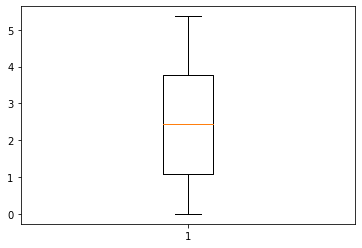

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcfcc4ef250>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcfcc4efd10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcfcc566590>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcfcc4f8790>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcfcc4f8c90>],
 'means': []}

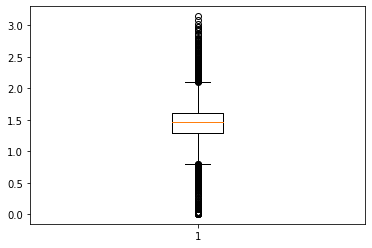

In [9]:
plt.boxplot(pedDf['displacementY'])
plt.show()
plt.boxplot(pedDf['speed'])

## Preprocessing data
### 1. filter out data with low Y displacement

using min Y displacement (5)


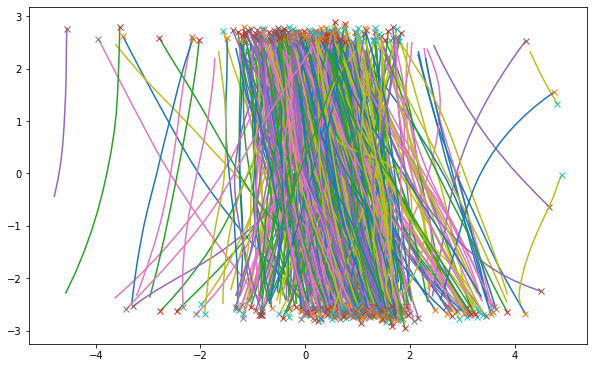

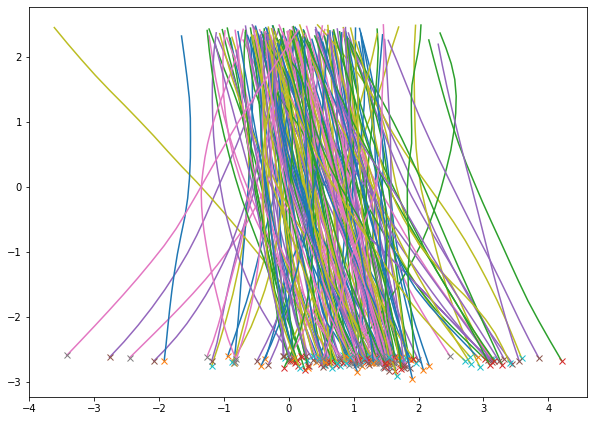

In [10]:
cleanPedDf = cleaner.cleanByYDisplacement(pedDf, byIQR=False)
visualizer.show(pedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')
visualizer.show(cleanPedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')

### 2. Transform trajectories to local source coordinate system

In [11]:
allPedIds = list(cleanPedDf["uniqueTrackId"].unique())
transformer.translateAllToLocalSource(cleanPedDf)
cleanPedDf.head()

,recordingId,frame,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration,speed,displacementX,displacementY,localX,localY
0,18,751,18023,10,5.0,0.633506,2.406819,-0.124725,1.197404,-0.200707,-0.049552,1.203882,0.000000,0.000000,0.000000,0.000000
1,18,756,18023,10,5.0,0.653314,2.163065,-0.099043,1.218770,-0.128407,-0.106831,1.222788,0.019809,0.243754,0.019809,-0.243754
2,18,761,18023,10,5.0,0.674600,1.919279,-0.106426,1.218930,0.036911,-0.000799,1.223567,0.041094,0.487540,0.041094,-0.487540
3,18,766,18023,10,5.0,0.701232,1.674626,-0.133163,1.223264,0.133686,-0.021670,1.230490,0.067726,0.732193,0.067726,-0.732193
4,18,771,18023,10,5.0,0.728331,1.426538,-0.135494,1.240441,0.011656,-0.085887,1.247819,0.094825,0.980281,0.094825,-0.980281


In [23]:
tracksMeta.head()

,uniqueTrackId,initialFrame,finalFrame,numFrames,class,horizontalDirection,verticalDirection
0,18023,751,861,23,pedestrian,EAST,SOUTH
1,18042,1638,1768,27,pedestrian,WEST,NORTH
2,18053,2696,2816,25,pedestrian,EAST,SOUTH
3,18069,4180,4265,18,pedestrian,EAST,SOUTH
4,18090,5369,5434,14,pedestrian,EAST,SOUTH


In [26]:
tracksMeta[(tracksMeta['verticalDirection'] == 'NORTH') & (tracksMeta['class'] == 'pedestrian')]

,uniqueTrackId,initialFrame,finalFrame,numFrames,class,horizontalDirection,verticalDirection
1,18042,1638,1768,27,pedestrian,WEST,NORTH
5,18107,6603,6698,20,pedestrian,WEST,NORTH
6,18112,6614,6704,19,pedestrian,WEST,NORTH
10,18162,10313,10373,13,pedestrian,WEST,NORTH
12,18168,10248,10353,22,pedestrian,EAST,NORTH
...,...,...,...,...,...,...,...
566,29533,27659,27759,21,pedestrian,WEST,NORTH
568,29542,28317,28402,18,pedestrian,WEST,NORTH
569,29554,28894,28969,16,pedestrian,WEST,NORTH
570,29559,31825,31910,18,pedestrian,WEST,NORTH


In [24]:
allPedIds

[18023,
 18053,
 18069,
 18090,
 18127,
 18134,
 18166,
 18180,
 18181,
 18225,
 18279,
 18280,
 18311,
 18313,
 18337,
 18382,
 19045,
 19047,
 19055,
 19059,
 19060,
 19070,
 19071,
 19295,
 19320,
 19349,
 20043,
 20054,
 20083,
 20121,
 20189,
 20219,
 20229,
 20234,
 20252,
 20263,
 20279,
 20362,
 20369,
 20376,
 20379,
 20383,
 20384,
 21004,
 21040,
 21068,
 21071,
 21075,
 21115,
 21119,
 21133,
 21168,
 21169,
 21172,
 21175,
 21187,
 21189,
 21190,
 21193,
 21223,
 21285,
 21303,
 21404,
 21405,
 21412,
 21414,
 21454,
 21459,
 21463,
 21518,
 22133,
 22135,
 22151,
 22251,
 22288,
 22372,
 22416,
 22451,
 22458,
 22497,
 22509,
 22516,
 22517,
 22541,
 22557,
 23033,
 23053,
 23077,
 23147,
 23156,
 23188,
 23235,
 23248,
 23274,
 23275,
 23296,
 23336,
 23391,
 23410,
 23428,
 23431,
 23485,
 23493,
 23500,
 24001,
 24039,
 24063,
 2406501,
 24095,
 24122,
 24186,
 24187,
 24214,
 24291,
 24295,
 24297,
 24317,
 24318,
 24360,
 24364,
 24420,
 25025,
 25051,
 25052,
 25063

### 3. Rotate north-south trajectories to south-north trajectories

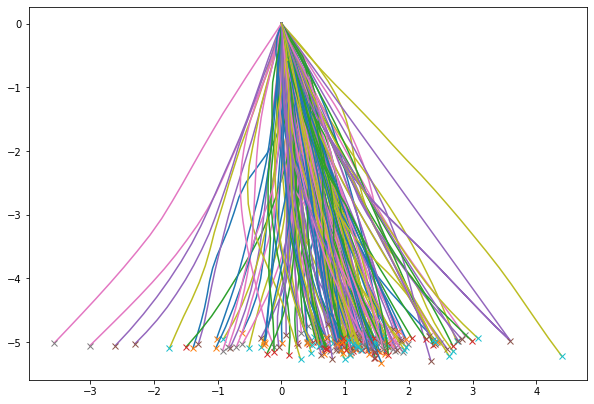

In [21]:
southIds = indTransformer.convertLocalToNorth(cleanPedDf, tracksMeta)
visualizer.show(cleanPedDf, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')

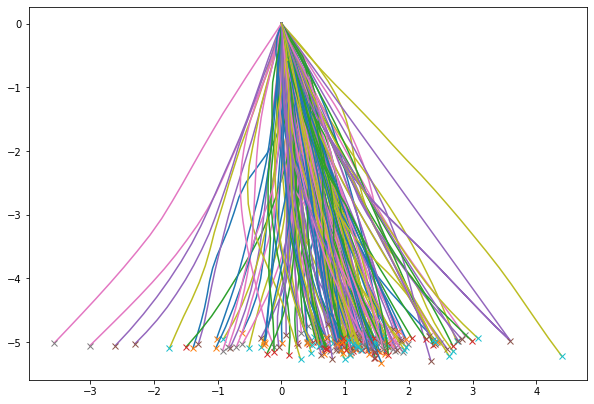

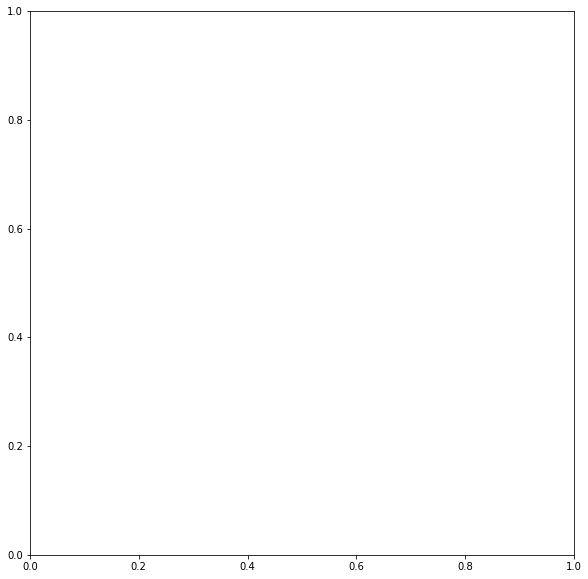

In [22]:
southPeds = cleanPedDf[cleanPedDf["uniqueTrackId"].isin(southIds)]
visualizer.show(southPeds, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')
northPeds = cleanPedDf[~cleanPedDf["uniqueTrackId"].isin(southIds)]
visualizer.show(northPeds, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')